### Betfair data testing

In [1]:
import betfairlightweight
from betfairlightweight import filters
import pandas as pd
import numpy as np
import os
import datetime
import json
#import git
from bz2 import BZ2File
import matplotlib.pyplot as plt

logins_dir =  'C:\\Users\\Asus\\OneDrive\\python\\betfair_project\\api_logins.json' #str(repo.working_tree_dir) + "/api_logins.json"

with open(logins_dir) as f:
    login_dict =  json.load(f)
    
trading = betfairlightweight.APIClient(username=login_dict['my_username'],
                                       password=login_dict['my_password'],
                                       app_key=login_dict['my_app_key'],
                                       certs=login_dict['certs_path'])

trading.login()

<LoginResource>

In [2]:
# Lists the data that you have purchased on your Betfair account
my_data = trading.historic.get_my_data()
for i in my_data:
    print(i)

{'sport': 'Horse Racing', 'plan': 'Advanced Plan', 'forDate': '2020-01-01T00:00:00', 'purchaseItemId': 41610}
{'sport': 'Horse Racing', 'plan': 'Advanced Plan', 'forDate': '2020-02-01T00:00:00', 'purchaseItemId': 41610}
{'sport': 'Horse Racing', 'plan': 'Advanced Plan', 'forDate': '2020-03-01T00:00:00', 'purchaseItemId': 41610}
{'sport': 'Horse Racing', 'plan': 'Advanced Plan', 'forDate': '2020-04-01T00:00:00', 'purchaseItemId': 41610}
{'sport': 'Horse Racing', 'plan': 'Advanced Plan', 'forDate': '2020-05-01T00:00:00', 'purchaseItemId': 41610}
{'sport': 'Horse Racing', 'plan': 'Pro Plan', 'forDate': '2020-04-01T00:00:00', 'purchaseItemId': 41353}
{'sport': 'Horse Racing', 'plan': 'Pro Plan', 'forDate': '2020-05-01T00:00:00', 'purchaseItemId': 41353}


In [3]:
# Breaks down the contents of the data you want to look into
collection_options = trading.historic.get_collection_options(
    "Horse Racing", "Advanced Plan", 1, 1, 2020, 1, 3, 2020
)

print(collection_options)

{'marketTypesCollection': [{'name': '', 'count': 1998}, {'name': 'ANTEPOST_WIN', 'count': 22}, {'name': 'DAILY_WIN_DIST', 'count': 1}, {'name': 'EACH_WAY', 'count': 1788}, {'name': 'FORECAST', 'count': 438}, {'name': 'MATCH_BET', 'count': 1692}, {'name': 'OTHER_PLACE', 'count': 4746}, {'name': 'PLACE', 'count': 9161}, {'name': 'RACE_WIN_DIST', 'count': 175}, {'name': 'REV_FORECAST', 'count': 784}, {'name': 'WIN', 'count': 11923}, {'name': 'WITHOUT_FAV', 'count': 306}], 'countriesCollection': [{'name': 'AE', 'count': 511}, {'name': 'AU', 'count': 11874}, {'name': 'ES', 'count': 6}, {'name': 'FR', 'count': 549}, {'name': 'GB', 'count': 10230}, {'name': 'HK', 'count': 1}, {'name': 'IE', 'count': 2147}, {'name': 'NZ', 'count': 2016}, {'name': 'SA', 'count': 44}, {'name': 'SG', 'count': 314}, {'name': 'US', 'count': 4038}, {'name': 'ZA', 'count': 1304}], 'fileTypeCollection': [{'name': 'E', 'count': 1998}, {'name': 'M', 'count': 31036}]}


In [4]:
basket_size = trading.historic.get_data_size(
    "Horse Racing", "Advanced Plan", 1, 1, 2020, 1, 3, 2020
)
print(basket_size)

{'totalSizeMB': 5731, 'fileCount': 33034}


In [5]:
# Test sample, Feb 1st UK horse racing data
file_list = trading.historic.get_file_list(
    "Horse Racing",
    "Advanced Plan",
    from_day=1,
    from_month=2,
    from_year=2020,
    to_day=1,
    to_month=2,
    to_year=2020,
    market_types_collection=["WIN"],
    countries_collection=["GB"],
    file_type_collection=["M"],
)
print(file_list)

['/xds_nfs/edp_processed/ADVANCED/2020/Feb/1/29678694/1.168130661.bz2', '/xds_nfs/edp_processed/ADVANCED/2020/Feb/1/29677422/1.168096552.bz2', '/xds_nfs/edp_processed/ADVANCED/2020/Feb/1/29678828/1.168136214.bz2', '/xds_nfs/edp_processed/ADVANCED/2020/Feb/2/29678760/1.168133543.bz2', '/xds_nfs/edp_processed/ADVANCED/2020/Feb/1/29678694/1.168130666.bz2', '/xds_nfs/edp_processed/ADVANCED/2020/Feb/1/29677422/1.168096559.bz2', '/xds_nfs/edp_processed/ADVANCED/2020/Feb/1/29678828/1.168136219.bz2', '/xds_nfs/edp_processed/ADVANCED/2020/Feb/1/29678694/1.168130671.bz2', '/xds_nfs/edp_processed/ADVANCED/2020/Feb/2/29678760/1.168133548.bz2', '/xds_nfs/edp_processed/ADVANCED/2020/Feb/1/29677422/1.168096566.bz2', '/xds_nfs/edp_processed/ADVANCED/2020/Feb/1/29678828/1.168136224.bz2', '/xds_nfs/edp_processed/ADVANCED/2020/Feb/2/29678760/1.168133553.bz2', '/xds_nfs/edp_processed/ADVANCED/2020/Feb/1/29678694/1.168130676.bz2', '/xds_nfs/edp_processed/ADVANCED/2020/Feb/1/29677422/1.168130245.bz2', '/xds

In [6]:
# Downloading the first file in that list. Each file is one race.
file = file_list[1]
print(file)
download = trading.historic.download_file(file_path=file)
print(download)

/xds_nfs/edp_processed/ADVANCED/2020/Feb/1/29677422/1.168096552.bz2
1.168096552.bz2


In [7]:
# Extracting the bz2 file to the working directory
filename = str(download)
zipfile = BZ2File(filename) # open the file
data = zipfile.read() # get the decompressed data
newfilepath = filename[:-4] # assuming the filepath ends with .bz2
open(newfilepath, 'wb').write(data) # write a uncompressed file
zipfile.close()

## Using stream listener to read extracted data

In [8]:
from betfairlightweight import StreamListener
from betfairlightweight.streaming.stream import MarketStream

class HistoricalStream(MarketStream):
    # create custom listener and stream

    def __init__(self, listener):
        super(HistoricalStream, self).__init__(listener)
        with open("output.txt", "w") as output:
            output.write("Time,MarketId,Status,Inplay,SelectionId,LastPriceTraded,TotalMatched\n")

    def on_process(self, market_books):
        with open("output.txt", "a") as output:
            for market_book in market_books:
                for runner in market_book.runners:

                    # how to get runner details from the market definition
                    market_def = market_book.market_definition
                    runners_dict = {
                        (runner.selection_id, runner.handicap): runner
                        for runner in market_def.runners
                    }
                    runner_def = runners_dict.get(
                        (runner.selection_id, runner.handicap)
                    )

                    output.write(
                        "%s,%s,%s,%s,%s,%s,%s\n"
                        % (
                            market_book.publish_time,
                            market_book.market_id,
                            market_book.status,
                            market_book.inplay,
                            runner.selection_id,
                            runner.last_price_traded or "",
                            runner.total_matched or "",
                        )
                    )


class HistoricalListener(StreamListener):
    def _add_stream(self, unique_id, stream_type):
        if stream_type == "marketSubscription":
            return HistoricalStream(self)
        
listener = HistoricalListener(max_latency=None)

stream = trading.streaming.create_historical_stream(
    directory=newfilepath,
    listener=listener,
)

In [16]:
stream.start()
#fills output.txt

In [33]:
df = pd.read_csv('output.txt')
df.head()

,Time,MarketId,Status,Inplay,SelectionId,LastPriceTraded,TotalMatched
0,2020-01-31 11:10:11.474000,1.168097,OPEN,False,18286408,NaN,NaN
1,2020-01-31 11:10:11.474000,1.168097,OPEN,False,26640937,NaN,NaN
2,2020-01-31 11:10:11.474000,1.168097,OPEN,False,21580749,NaN,NaN
3,2020-01-31 11:10:11.474000,1.168097,OPEN,False,27706761,NaN,NaN
4,2020-01-31 11:10:11.474000,1.168097,OPEN,False,52106,NaN,NaN


In [46]:
# Creating TradeSize
df['TradeSize'] = df.groupby(['SelectionId', 'LastPriceTraded'])['TotalMatched'].diff()
df.head()

,Time,MarketId,Status,Inplay,SelectionId,LastPriceTraded,TotalMatched,TradeSize
0,2020-01-31 11:10:11.474000,1.168097,OPEN,False,18286408,NaN,NaN,NaN
1,2020-01-31 11:10:11.474000,1.168097,OPEN,False,26640937,NaN,NaN,NaN
2,2020-01-31 11:10:11.474000,1.168097,OPEN,False,21580749,NaN,NaN,NaN
3,2020-01-31 11:10:11.474000,1.168097,OPEN,False,27706761,NaN,NaN,NaN
4,2020-01-31 11:10:11.474000,1.168097,OPEN,False,52106,NaN,NaN,NaN


In [49]:
#Picking one horse and following seeing its price movements in play
print(df.SelectionId.unique())

[18286408 26640937 21580749 27706761    52106 24608298]


In [52]:
# Looking at just selection 52106
df_52106 = df[df.SelectionId == 52106]
df_52106 = df_52106[df_52106.Inplay == True].reset_index()

Text(0, 0.5, 'Volume (£)')

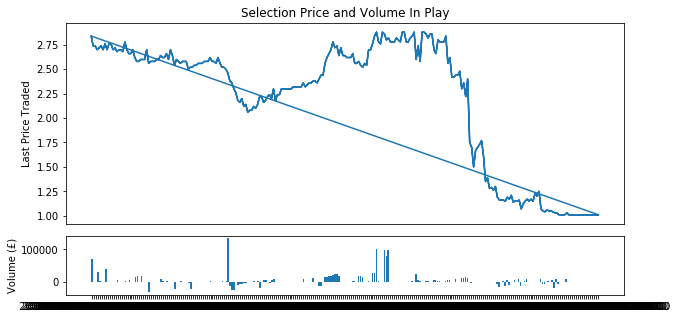

In [54]:
plt.figure(figsize=(10,5))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(df_52106.Time, df_52106.LastPriceTraded) 
bottom.bar(df_52106.Time, df_52106.TradeSize) 

top.axes.get_xaxis().set_visible(False)
top.set_title('Selection Price and Volume In Play')
top.set_ylabel('Last Price Traded')
bottom.set_ylabel('Volume (£)')

In [55]:
df.describe() #PROBLEM: TradeSize contains negative values

,MarketId,SelectionId,LastPriceTraded,TotalMatched,TradeSize
count,1.400460e+05,1.400460e+05,132054.000000,132054.000000,131652.000000
mean,1.168097e+00,1.981254e+07,25.670775,9192.535549,64.304516
std,6.477064e-13,9.379758e+06,64.616713,17999.629369,3920.773168
min,1.168097e+00,5.210600e+04,1.010000,3.990000,-157014.900000
25%,1.168097e+00,1.828641e+07,3.050000,414.550000,0.000000
50%,1.168097e+00,2.309452e+07,6.000000,1655.730000,0.000000
75%,1.168097e+00,2.664094e+07,26.000000,11864.980000,0.000000
max,1.168097e+00,2.770676e+07,1000.000000,225701.070000,155608.930000
